In [2]:
import pandas as pd
import numpy as np
df_flight = pd.read_csv("2004.csv")
df_flight.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2004,1,12,1,623.0,630,901.0,915,UA,462,...,7,11,0,NaN,0,0,0,0,0,0
1,2004,1,13,2,621.0,630,911.0,915,UA,462,...,16,16,0,NaN,0,0,0,0,0,0
2,2004,1,14,3,633.0,630,920.0,915,UA,462,...,4,15,0,NaN,0,0,0,0,0,0
3,2004,1,15,4,627.0,630,859.0,915,UA,462,...,4,10,0,NaN,0,0,0,0,0,0
4,2004,1,16,5,635.0,630,918.0,915,UA,462,...,3,13,0,NaN,0,0,0,0,0,0


In [3]:
# Filter out unimportant columns

df_flight = df_flight[['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',                     
 'CRSDepTime',
 'ArrDelay',                     
 'Origin',
 'Distance',
 'Cancelled' ]]

df_flight.head(5)

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,ArrDelay,Origin,Distance,Cancelled
0,2004,1,12,1,630,-14.0,ORD,599,0
1,2004,1,13,2,630,-4.0,ORD,599,0
2,2004,1,14,3,630,5.0,ORD,599,0
3,2004,1,15,4,630,-16.0,ORD,599,0
4,2004,1,16,5,630,3.0,ORD,599,0


In [4]:
df_flight.shape

(7129270, 9)

In [5]:
# How much of your data is missing?
df_flight.isnull().sum().sort_values(ascending=False).head()

ArrDelay      141541
Cancelled          0
Distance           0
Origin             0
CRSDepTime         0
dtype: int64

In [6]:
df_flight[df_flight['Cancelled'] == 1].head(5)

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,ArrDelay,Origin,Distance,Cancelled
12,2004,1,26,1,630,NaN,ORD,599,1
21,2004,1,4,7,1505,NaN,ORD,1739,1
23,2004,1,6,2,1505,NaN,ORD,1739,1
24,2004,1,7,3,1510,NaN,ORD,1739,1
25,2004,1,8,4,1510,NaN,ORD,1739,1


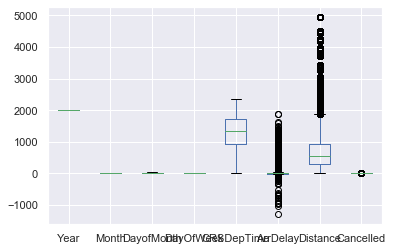

In [7]:
import matplotlib.pyplot as plt
#pd.options.display.mpl_style = 'default'
df_flight.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000181D3FB6588>,
      dtype=object)

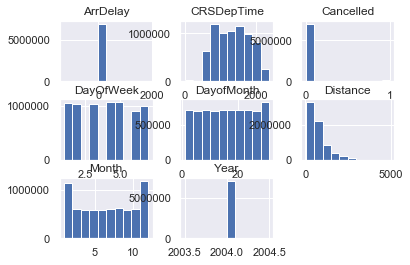

In [8]:
df_flight.hist()

In [9]:
# Assign outcome as 0 if ArrDelay <=10 and as 1 if ArrDelay >10 and 2 is flight is cancelled
def delay_df(df):

    if (df['ArrDelay'] <= 10 and df['Cancelled'] == 0):
        return 0
    elif (df['ArrDelay'] > 10 and df['Cancelled'] == 0):
        return 1
    elif (df['Cancelled'] == 1):
        return 2
    else :return 0

df_flight['ArrDelay'] = df_flight.apply(delay_df, axis = 1)

In [10]:
# How much of your data is missing?
df_flight.isnull().sum().sort_values(ascending=False).head()

Cancelled     0
Distance      0
Origin        0
ArrDelay      0
CRSDepTime    0
dtype: int64

In [11]:
# Take a look at the outcome variable: 'ArrDelay'
print(df_flight['ArrDelay'].value_counts())
# Assign X as a DataFrame of features and y as a Series of the outcome variable
X = df_flight.drop('ArrDelay', 1)
y = df_flight.ArrDelay

0    5277005
1    1724508
2     127757
Name: ArrDelay, dtype: int64


In [12]:
print(X.head(5))
print(y.head(5))

   Year  Month  DayofMonth  DayOfWeek  CRSDepTime Origin  Distance  Cancelled
0  2004      1          12          1         630    ORD       599          0
1  2004      1          13          2         630    ORD       599          0
2  2004      1          14          3         630    ORD       599          0
3  2004      1          15          4         630    ORD       599          0
4  2004      1          16          5         630    ORD       599          0
0    0
1    0
2    0
3    0
4    0
Name: ArrDelay, dtype: int64


In [13]:
# Take a look at the outcome variable: 'Origin'
print(X['Origin'].value_counts().head(10))

ATL    418072
ORD    376170
DFW    344834
LAX    232621
CVG    208011
IAH    202030
PHX    170209
LAS    158177
EWR    158150
DEN    155205
Name: Origin, dtype: int64


In [14]:
# In this case, bucket low frequecy categories as "Other"
X['Origin'] = [1 if x == 'ATL' else 2 if x == 'ORD' else 3 if x == 'DFW' else 4 if x == 'LAX' 
               else 5 if x == 'CVG' else 6 for x in X['Origin']]

print(X['Origin'].value_counts().sort_values(ascending=False))

6    5549562
1     418072
2     376170
3     344834
4     232621
5     208011
Name: Origin, dtype: int64


In [15]:
# Plot histograms to show distribution of features by outcome categories
%matplotlib inline
import matplotlib.pyplot as plt

def plot_histogram_dv(x,y):
    plt.hist(list(x[y==0]), alpha=0.5, label='Outcome=0')
    plt.hist(list(x[y==1]), alpha=0.5, label='Outcome=1')
    plt.title("Histogram of '{var_name}' by Outcome Category".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
plot_histogram_dv(X['Month'], y)

In [17]:
# Use train_test_split in sklearn.model_selection to split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=1)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
y_pred = knn.predict(X_test)

In [20]:
# Let’s evaluate our KNN model!
from sklearn.metrics import classification_report,confusion_matrix
print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=5


[[944276 110227    374]
 [261370  83929    229]
 [ 20137   4857    455]]


              precision    recall  f1-score   support

           0       0.77      0.90      0.83   1054877
           1       0.42      0.24      0.31    345528
           2       0.43      0.02      0.03     25449

    accuracy                           0.72   1425854
   macro avg       0.54      0.39      0.39   1425854
weighted avg       0.68      0.72      0.69   1425854



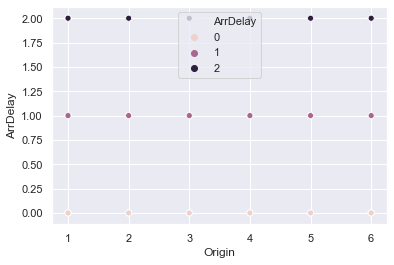

In [21]:
import seaborn as sns
sns.set()

sns.scatterplot(
    x='Origin',
    y='ArrDelay',
    hue='ArrDelay',
    data=X_test.join(y_test, how='outer')
)

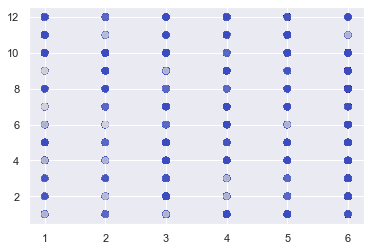

In [22]:
plt.scatter(
    X_test['Origin'],
    X_test['Month'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)